In [1]:
import numpy as np #lin. Alg.
import pandas as pd #data processing
import matplotlib.pyplot as plt
import matplotlib.image as matimg

#importing keras modules
import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model
from keras import backend as K
from keras import optimizers

#Python Image Library for image processing
from PIL import Image

import os

#Path of parasite and uninfected folders
image_path="D:malariaData/cell_images/"




Using TensorFlow backend.


In [2]:
EXT = ".png"
WIDTH = 50 #Width of the transformed image
SIZE = (WIDTH, WIDTH) #Square final image
NUM_IMAGES = 13780 
AMOUNT_TRAIN = .8

#Splitting data into test and train sets
xtrain = []
xtest = []
ytrain = []
ytest = []

#Opens particular image, resizes it, and returns a numpy array of it
def get_im_array(f, size):
    im = Image.open(f).resize(size)
    return np.array(im)

#directories of infected and uninfected images
par_dir = image_path + 'Parasitized/'
uninf_dir = image_path+ 'Uninfected/'

#files in each directory
par_im_files = os.listdir(par_dir)
un_im_files = os.listdir(uninf_dir)



i = 1 #iterator


for f in par_im_files:
    if f.endswith(EXT):
        if i <= NUM_IMAGES*AMOUNT_TRAIN:
            xtrain.append(get_im_array(par_dir+f, SIZE))
            ytrain.append(1)
        else:
            xtest.append(get_im_array(par_dir+f, SIZE))
            ytest.append(1)
    i+=1

i = 1

for f in un_im_files:
    if f.endswith(EXT):
        if i <= NUM_IMAGES*AMOUNT_TRAIN:
            xtrain.append(get_im_array(uninf_dir+f, SIZE))
            ytrain.append(0)
        else:
            xtest.append(get_im_array(uninf_dir+f, SIZE))
            ytest.append(0)
    i+=1


X_train = np.array(xtrain)
y_train = np.array(ytrain)
X_test = np.array(xtest)
y_test = np.array(ytest)

x_train = X_train.reshape(X_train.shape[0], 50, 50, 3)/255.
x_test = X_test.reshape(X_test.shape[0], 50, 50, 3)/255.



In [3]:
#HyperParamters
#Max Pooling Sizes
m_1 = 2
m_4 = 2
#Dropout values of the layers
d_1 = .3
d_2 = .2
#kernel sizes
k_1 = 3
k_2 = 3
k_3 = 3
k_4 = 3
#Convolution layer sizes
c_1 = 32
c_2 = 64
c_3 = 64
c_4 = 32


In [5]:
data_format = 'channels_last'

#Building model
model = Sequential()

#Block1
model.add(Conv2D(c_1, kernel_size=(k_1, k_1), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(m_1,m_1)))

#Block2
model.add(Conv2D(c_2, kernel_size=(k_2, k_2), activation='relu', padding='same'))

#Block3
model.add(Conv2D(c_3, kernel_size=(k_3, k_3), activation='relu', padding='same'))

#Block4
model.add(Conv2D(c_4, kernel_size=(k_4, k_4), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(m_4,m_4)))

#Block5
model.add(Flatten())
model.add(Dropout(d_1))
model.add(Dense(128, activation='relu'))

#Block6
model.add(Dropout(d_2))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

keras.utils.print_summary(model)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 25, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
___________________________

In [6]:
#Number of epochs to train with
epoch_num = 25

model_log = model.fit(x_train, y_train, epochs=epoch_num, batch_size=2000, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 22048 samples, validate on 5510 samples
Epoch 1/25
22048/22048 [==============================] - 59s 3ms/step - loss: 0.7019 - acc: 0.5312 - val_loss: 0.7055 - val_acc: 0.5002
Epoch 2/25
22048/22048 [==============================] - 54s 2ms/step - loss: 0.6917 - acc: 0.5290 - val_loss: 0.6909 - val_acc: 0.5076
Epoch 3/25
22048/22048 [==============================] - 54s 2ms/step - loss: 0.6579 - acc: 0.6129 - val_loss: 0.7143 - val_acc: 0.5180
Epoch 4/25
22048/22048 [==============================] - 54s 2ms/step - loss: 0.6780 - acc: 0.5748 - val_loss: 0.6848 - val_acc: 0.5583
Epoch 5/25
22048/22048 [==============================] - 54s 2ms/step - loss: 0.6643 - acc: 0.5863 - val_loss: 0.6717 - val_acc: 0.5962
Epoch 6/25
22048/22048 [==============================] - 54s 2ms/step - loss: 0.6255 - acc: 0.6529 - val_loss: 0.9351 - val_acc: 0.5114
Epoch 7/25
22048/22048 [==============================] - 54s 2ms/step - loss: 0.

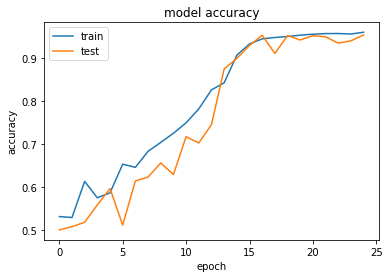

In [7]:
#Plot accuracy vs Epochs
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [32]:
#Save a Keras model as an .h5 file
model.save('malaria_model.h5')

In [85]:
#Load a Keras model from a .h5 file
model = load_model('malaria_model.h5')

Prediction: 
[[0.8877111]]

Correct: 
1


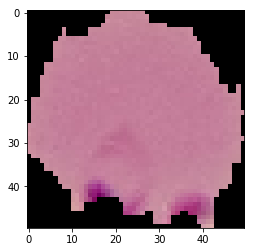

In [10]:
#Shows the image and prediction for the 'view_num' element of the test set.
view_num = 2


print('Prediction: ')
print(model.predict(x_test[view_num:view_num+1]))
print()
print('Correct: ')
print(y_test[view_num])

#Displays the image
img = Image.fromarray((X_test.reshape(X_test.shape[0], 50, 50, 3))[view_num], 'RGB')
im_array = np.asarray(img)
plt.imshow(im_array)
plt.show()


In [14]:
#Prints the confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
for i in range(len(y_pred)):
    if y_pred[i]>=.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion_matrix(y_test, y_pred)

array([[2625,  130],
       [ 129, 2626]], dtype=int64)